# Wrangle and Analyze Data

**Welcome** to the Wrangle and Analyze Data project! This project aims to be wrangling, analyzing and visualizing tweets data of @dog_rates, known as WeRateDogs, to create interesting and trustworthy analyses and insights. <br>
The project walks throughout three steps: Gathering data which is the first step in data wrangling. Then, Assessing data which is the detect and explore issues of the data and it's preparing the precursor to cleaning data. Finally, Cleaning data that is where to fix the quality and tidiness issues identified in the assessing step.<br><br>
**Let's** start the journey!

## Table of Contents
<ul>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#analyse">Analysing Data</a></li>
</ul>

<a id='gather'></a>
## Gathering Data

In this section, the dataset that will be working on is gathering from different sources and in different formats: The tweet archive of Twitter user @dog_rates in `twitter_archive_enhanced.csv`. The tweet image predictions inside the `image_predictions.tsv` file. The tweet's retweet and favourite count that's store in a file called `tweet_json.txt`.<br>
To get started, let's import the libraries.

In [1]:
import requests
import os
import tweepy
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [3]:
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [4]:
df_img = pd.read_csv('image-predictions.tsv', sep = '\t')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
df_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
auth = tweepy.OAuthHandler('', '')
auth.set_access_token('', '')
api = tweepy.API(auth)

In [7]:
with open('tweet-json copy') as file:
    data = [json.loads(line) for line in file] #list of dictionaries
data[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [8]:
#tweet ID, retweet count, and favorite count
tweets_list = []
for i in data:
    tweet_id = i['id']
    retweet_count = i['retweet_count']
    favorite_count = i['favorite_count']
    full_text = i['full_text']
    tweet_time = i['created_at']
    tweets_list.append({'tweet_id': tweet_id,
                     'retweet_count': retweet_count,
                     'favorite_count': favorite_count})
df_tweets = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
## Assessing Data

In this section, the dataset will be assessed for quality and tidiness issues after detecting and covering it using both ways visually and programmatically.

### Quality Issues

**The Image Prediction Table**

In [9]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> No have null data, great!

In [10]:
#chek the data range of img_num is (1-4)
df_img.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

In [11]:
df_img.p1_conf.max(), df_img.p2_conf.max(), df_img.p3_conf.max()

(1.0, 0.4880140000000001, 0.273419)

> `p1` has cell with 100% accuracey! it's true or there is over-qualified!

In [12]:
df_img[df_img.p1_conf == 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


> `p1_dog` is false?? with conf 100%

In [13]:
df_img[df_img.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


> There is no duplicated rows

**The Tweet Archive Table**

In [14]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> - There are columns with null values! <br>
> - Convert `timestamp` data type from object to date <br>
> - Convert `in_reply_to_status_id` and `in_reply_to_user_id` from float to int <br>
> - Take the original tweets (exclude retweeted data)

In [15]:
df_arch.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

> Take the type from tweet's `source`

In [16]:
df_arch['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2356, dtype: object

> Filling nan in `expanded_urls` with Twitter's url + tweet id

In [17]:
df_arch.name.describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

> Replace 'none' in `name` with nan value

In [18]:
df_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [19]:
df_arch.name[df_arch.name.str.islower()].sample(10)

2287           a
2222           a
1936         one
801            a
1382           a
2334           a
1724          by
1040    actually
2352           a
1368           a
Name: name, dtype: object

> Replace the names which begin with a small letter such as ('a', 'my', 'his', 'an', 'all', 'by', 'life') with null values

In [20]:
df_arch.doggo.unique(), df_arch.floofer.unique(), df_arch.pupper.unique(), df_arch.puppo.unique()

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

> Replace the latest four columns from 'None' to nan value

In [21]:
df_arch.rating_numerator.max(), df_arch.rating_denominator.max()

(1776, 170)

In [22]:
df_arch.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

> There are more than 75% of data have `rating_denominator` with 10. So, coordinating the others according to it.

In [23]:
df_arch[df_arch.rating_denominator > 10] # 20 cases have rating above than 10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [24]:
df_arch.rating_numerator[df_arch.rating_numerator >= df_arch.rating_denominator].count() # 1914 cases

1914

> All cases that have the `rating_numerator` is bigger than the `rating_denominator` that's meaning the rating is 100%. So, to coordinating data, there will be converting these to 10/10, also it's meaning 100%.

In [25]:
df_arch[(df_arch.rating_numerator < df_arch.rating_denominator) & (df_arch.rating_denominator > 10)] # 7 cases

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


> Regarding the cases that have the `rating_numerator` is less than the `rating_denominator`, also they above than 10:<br>
By return to each tweet from this, the conclude: 
> - Delete the first row (referring to the lunch account's date). 
    - `id = 832088576586297345` <br>
> - The second row referred to 11 Sep(no means rating). So, delete. 
    - `id = 740373189193256964`<br>
> - Replace 4/20 to 13/10. (the rating_numerator is more than the rating_denominator) so it will be 10/10. 
    - `id = 722974582966214656` 	<br>
> - The rating 45/50 is for five dogs in the image. So, divide 45 for 5 to rating each dog with 10. 
    - `id = 709198395643068416` <br>
> - Take the percentage of 4/20. So, convert to 2/10. 
    - `id = 686035780142297088`
> - The last one, take the percentage (7/11) to convert it from 10. [(7/11) ~ 63%] the nearest int persentege is (60%) that is 6/10. 
    - `id = 682962037429899265`

In [26]:
df_arch[df_arch.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> There is no duplicates row

**The Tweets Table**

In [27]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


> Great, no null data and it's the appropriate data type

In [28]:
df_tweets[df_tweets.duplicated()]

,tweet_id,retweet_count,favorite_count


> No contains duplicate rows

In [29]:
df_tweets.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [30]:
df_tweets.favorite_count.describe()

count      2354.000000
mean       8080.968564
std       11814.771334
min           0.000000
25%        1415.000000
50%        3603.500000
75%       10122.250000
max      132810.000000
Name: favorite_count, dtype: float64

In [31]:
df_tweets[df_tweets.favorite_count == 132810]

,tweet_id,retweet_count,favorite_count
412,822872901745569793,48265,132810


In [32]:
df_arch[df_arch.tweet_id == 822872901745569793].expanded_urls

413    https://twitter.com/dog_rates/status/822872901...
Name: expanded_urls, dtype: object

> By referring to the tweet, the number is approximately right.

**Quality Issues Conclusion:**
> - There are columns with null values! <br>
> - Convert `timestamp` data type from object to date <br>
> - Convert `in_reply_to_status_id` and `in_reply_to_user_id` from float to int <br>
> - Take the original tweets (exclude retweeted data)<br>
> - Take the type from tweet's `source` <br>
> - Filling nan in `expanded_urls` with Twitter's url + tweet id <br>
> - Replace 'none' in `name` with nan value and replace the names which begin with a small letter such as ('a', 'my', 'his', 'an', 'all', 'by', 'life') with null values <br>
> - Replace the latest four columns from 'None' to nan value <br>
> - Coordinate the rating data for 10: <br>
    - All cases that have the `rating_numerator` is bigger than the `rating_denominator` will be converting to 10/10. <br>
    - Delete the first row (referring to the lunch account's date). 
        - `id = 832088576586297345` <br>
    - The second row referred to 11 Sep(no means rating). So, delete. 
        - `id = 740373189193256964`<br>
    - Replace 4/20 to 13/10. (the `rating_numerator` is bigger than the `rating_denominator`) so it will be 10/10. 
        - `id = 722974582966214656` 	<br>
    - The rating 45/50 is for five dogs in the image. So, divide 45 for 5 to rating each dog with 10. 
        - `id = 709198395643068416` <br>
    - Take the percentage of 4/20. So, convert to 2/10. 
        - `id = 686035780142297088`
    - The last one, take the percentage (7/11) to convert it from 10. [(7/11) ~ 63%] the nearest int percentage is (60%) that is 6/10. 
        - `id = 682962037429899265`

### Tidiness Issues
- Join the dog stages [`doggo`,`floofer`,`pupper`,`puppo`] into one column.
- Join favoriate and retweeted count with archive dataset

In [33]:
#join (retweet and favorite counts) with tweet archive, using the key (tweet ID)
df_tweets.tweet_id.dtypes == df_arch.tweet_id.dtypes # should be true

True

In [34]:
len(df_tweets) == len(df_arch) # should they have the same rows??

False

<a id='clean'></a>
## Cleaning Data

In this section, it will be fixing the quality and tidiness issues of the dataset identified previously. Also, testing each one to verify the truth of coding.<br>
Let's start with tidiness issues.

In [35]:
df_archive_clean = df_arch.copy()
df_tweet_clean = df_tweets.copy()

**Tidiness Issues**

### Ddefine

- Join the dog stages [`doggo`,`floofer`,`pupper`,`puppo`] into one column.

### Code

In [36]:
# Exclude None
df_archive_clean['doggo'].replace('None', '', inplace=True)
df_archive_clean['floofer'].replace('None', '', inplace=True)
df_archive_clean['pupper'].replace('None', '', inplace=True)
df_archive_clean['puppo'].replace('None', '', inplace=True)

# Join in one column
df_archive_clean['stage'] = df_archive_clean.doggo.str.cat(df_archive_clean.floofer).str.cat(df_archive_clean.pupper).str.cat(df_archive_clean.puppo)

# Drop the old colomns
df_archive_clean.drop(columns = ['doggo','floofer','pupper','puppo'], inplace = True)

# Assign nan value
df_archive_clean['stage'] = df_archive_clean['stage'].replace('', np.nan)

### Test

In [37]:
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

### Define

- Join favoriate and retweeted count with `archive dataset`

### Code

In [38]:
df_clean = df_archive_clean.join(df_tweet_clean.set_index('tweet_id'), how='inner', on = 'tweet_id')

### Test

In [39]:
df_clean.head(1) # check from df shapes

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467


**Quality Issues**

### Define 

- Filling nan in `expanded_urls` with Twitter's `url` + `tweet id`

### Code

In [40]:
url = 'https://twitter.com/dog_rates/status/'
df_clean.expanded_urls = df_clean.expanded_urls.fillna(url + df_clean.tweet_id.apply(str))

### Test

In [41]:
sum(df_clean.expanded_urls.isnull())

0

### Define

- Convert `timestamp` data type from object to date

### Code

In [42]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

### Test

In [43]:
df_clean.timestamp.dtypes

datetime64[ns, UTC]

### Define

- Dropping the columns have nan values from `df_clean`

### Code

In [44]:
df_clean.dropna(axis='columns', inplace = True)   

### Test

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2354 non-null   int64              
 1   timestamp           2354 non-null   datetime64[ns, UTC]
 2   source              2354 non-null   object             
 3   text                2354 non-null   object             
 4   expanded_urls       2354 non-null   object             
 5   rating_numerator    2354 non-null   int64              
 6   rating_denominator  2354 non-null   int64              
 7   name                2354 non-null   object             
 8   retweet_count       2354 non-null   int64              
 9   favorite_count      2354 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 202.3+ KB


### Define

- Take the original tweets (exclude retweeted data)

### Code

In [46]:
# exclude it from data, it's text begin with'RT' (181 cases)
df_clean.drop(df_clean.loc[df_clean.text.str.contains('RT @'), 'text'].index, axis = 0, inplace = True)
df_clean.reset_index(drop=True, inplace=True)

### Test

In [47]:
df_clean.shape[0] #number of dataset is 2355 - number of retweeted data is 181

2175

### Define

- Take the type from tweet's `source`

### Code

In [48]:
for i in range(len(df_clean.source)):
    df_clean.source[i] = df_clean.source[i][(df_clean.source[i].index('>') + 1):-4]

F:\DataScience\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
#cleanr = re.compile('<.*?>') 
#for src in df.source:
#    df.loc[src, 'source'] = re.sub(cleanr,'',src)

### Test

In [50]:
df_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Define

- Replace 'None' in `name` and the names which begin with a small letter such as ('a', 'my', 'his', 'an', 'all', 'by', 'life') with null values

### Code

In [51]:
df_clean.loc[df_clean.name.str.islower(), 'name'] = np.nan
df_clean['name'].replace(['None'], np.nan, inplace=True)

### Test

In [52]:
df_clean.name.isnull().sum()

784

### Define

- Coordinate the rating data for 10: <br>
    - All cases that have the `rating_numerator` is bigger than the `rating_denominator` will be converting to 10/10. <br>
    - Delete the first row (referring to the lunch account's date). 
        - `id = 832088576586297345` <br>
    - The second row referred to 11 Sep(no means rating). So, delete. 
        - `id = 740373189193256964`<br>
    - Replace 4/20 to 13/10. (the `rating_numerator` is bigger than the `rating_denominator`) so it will be 10/10. 
        - `id = 722974582966214656` 	<br>
    - The rating 45/50 is for five dogs in the image. So, divide 45 for 5 to rating each dog with 10. 
        - `id = 709198395643068416` <br>
    - Take the percentage of 4/20. So, convert to 2/10. 
        - `id = 686035780142297088`
    - The last one, take the percentage (7/11) to convert it from 10. [(7/11) ~ 63%] the nearest int percentage is (60%) that is 6/10. 
        - `id = 682962037429899265`

### Code

In [53]:
# Convert rating to 10
df_clean.loc[df_clean.rating_numerator >= df_clean.rating_denominator, ['rating_numerator', 'rating_denominator']] = 10

# Delete the wronge detect rating
indexes = df_clean[ (df_clean.tweet_id == 832088576586297345)  | (df_clean.tweet_id == 740373189193256964)].index
df_clean.drop(indexes , inplace=True)

# Update the rating that above than 10 with approperate meaning
df_clean.loc[df_clean.tweet_id == 722974582966214656,['rating_numerator','rating_denominator']] = 10, 10
df_clean.loc[df_clean.tweet_id == 709198395643068416,['rating_numerator','rating_denominator']] = 9, 10
df_clean.loc[df_clean.tweet_id == 686035780142297088,['rating_numerator','rating_denominator']] = 2, 10
df_clean.loc[df_clean.tweet_id == 682962037429899265,['rating_numerator','rating_denominator']] = 6, 10

### Test

In [54]:
df_clean.rating_numerator.max(), df_clean.rating_denominator.max() # should be 10,10

(10, 10)

### Storing Data

After gathered, assessed and cleaned data, now is the time to storing it and working on to exploring what there.

In [55]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='analyse'></a>
## Analysing Data

In this section, the dataset will analyse the insights and displays the visualizations produced from the wrangled data. The exploration and analysing of wrangled data are supporting to make and build related decisions. 

In [56]:
df_analyse = pd.read_csv('twitter_archive_master.csv')

To discover what is the most source using in writing the account's tweet, we have to analyse the `source` column in the dataset.

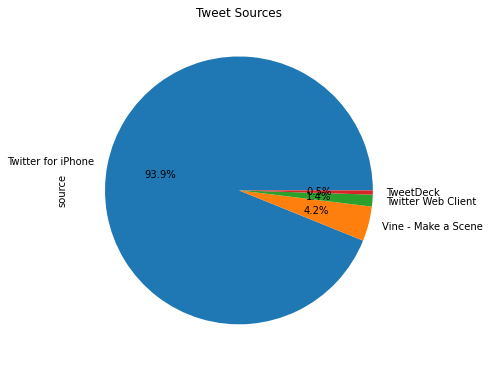

In [57]:
df_analyse.source.value_counts().plot(kind = 'pie', autopct= '%1.1f%%', figsize=(6,8))
plt.title('Tweet Sources');

> The most tweets source using is 'Twitter for iPhone'

Let's see the rating number of dogs, are the most in the median, above or below? To know that, we have to refer to `rating_numerator` and `rating_denominator` columns and analysing these values.

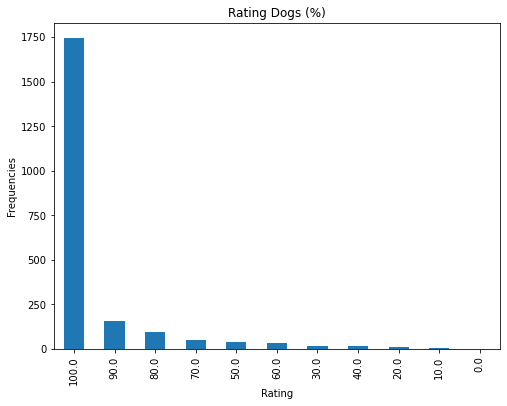

In [58]:
x = df_analyse.rating_numerator
y = df_analyse.rating_denominator
(((x/y)*100).value_counts()).plot(kind = 'bar', figsize=(8, 6))
plt.title('Rating Dogs (%)')
plt.xlabel('Rating')
plt.ylabel('Frequencies');

> 80% of these tweets they are rating with (10/10) 100% 

Here, what about discovering the relation between a retweet and favourite count for a tweet? Is there a relation between them? Are there increasing or decreasing together? Ok, we have to analyse these columns to get these answers. 

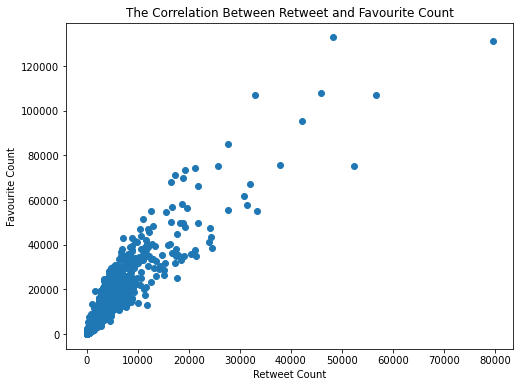

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(df_analyse.retweet_count, df_analyse.favorite_count)
plt.title('The Correlation Between Retweet and Favourite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favourite Count');

> The relation between retweet count and favourite count is a strong positive linear relationship.